### Numpy array vs Python lists

In [1]:
a = [ i for i in range(100000000)]
b = [ i for i in range(100000000,200000000)]

c = []

import time

start = time.time()
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time()-start)

33.352723360061646


In [5]:
import numpy as np
import time
a = np.arange(100000000)
b = np.arange(100000000,200000000)
start = time.time()
c = a + b 
print(time.time() - start )


0.514326810836792


In [4]:
a = [ i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

### Advanced Indexing

In [6]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [27]:
a[1,2]

np.int64(6)

In [28]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [29]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [7]:
#boolean masking
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[16, 70, 84, 59],
       [73, 52, 18, 21],
       [61, 46, 54, 12],
       [67, 40, 11,  4],
       [94, 39, 56, 24],
       [83,  5,  3, 98]], dtype=int32)

In [8]:
a[a>50]

array([70, 84, 59, 73, 52, 61, 54, 67, 94, 56, 83, 98], dtype=int32)

In [9]:
a[a%2==0]

array([16, 70, 84, 52, 18, 46, 54, 12, 40,  4, 94, 56, 24, 98],
      dtype=int32)

In [10]:
a[(a>50)&(a%2==0)]

array([70, 84, 52, 54, 94, 56, 98], dtype=int32)

In [11]:
a[~ (a % 7 == 0)]

array([16, 59, 73, 52, 18, 61, 46, 54, 12, 67, 40, 11,  4, 94, 39, 24, 83,
        5,  3], dtype=int32)

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [35]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [36]:
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1, 3)
print(a)
print(b)
print(a+b)


[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [37]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [38]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [40]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3, 1)
print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [44]:
a = np.array([1])
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [45]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4, 3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [46]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [47]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [49]:
def sigmoid(array):
    return 1/(1+np.exp(-(array)))
a = np.arange(100)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [12]:
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1, 50, 25)


In [13]:
def mse(actual,predicted):
    return np.mean((actual - predicted)**2)
mse(actual,predicted)

np.float64(235.76)

In [14]:
np.mean((actual-predicted)**2)

np.float64(235.76)

In [15]:
actual

array([42, 47,  8,  9, 43, 30, 26, 49, 23, 21, 13, 28, 32, 32, 30,  2, 45,
       31, 20, 43, 41, 27, 43,  5, 39], dtype=int32)

In [16]:
predicted

array([41, 11,  3,  1, 36, 26, 20, 16, 15, 38,  3,  2,  4, 26,  4,  6, 26,
       21,  9, 38, 33, 26, 45,  4, 39], dtype=int32)

### Working with missing values

In [3]:
import numpy as np
a = np.array([1,2,3,4,np.nan,6,7,np.nan])
a

array([ 1.,  2.,  3.,  4., nan,  6.,  7., nan])

In [5]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6., 7.])

### Plotting Graphs

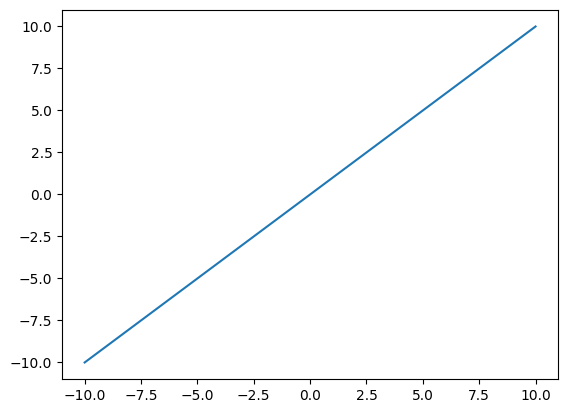

In [65]:

import matplotlib.pyplot as plt # type: ignore

x = np.linspace(-10,10,100)
y=x
plt.plot(x,y)

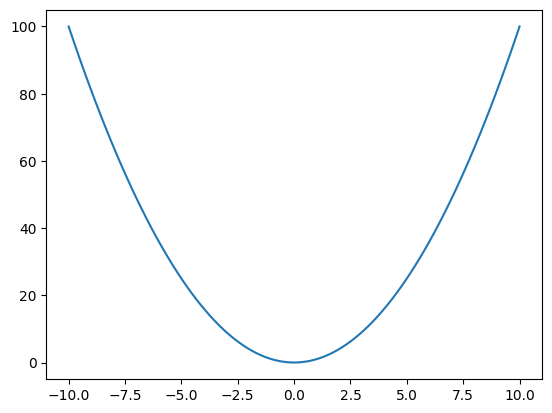

In [63]:
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)

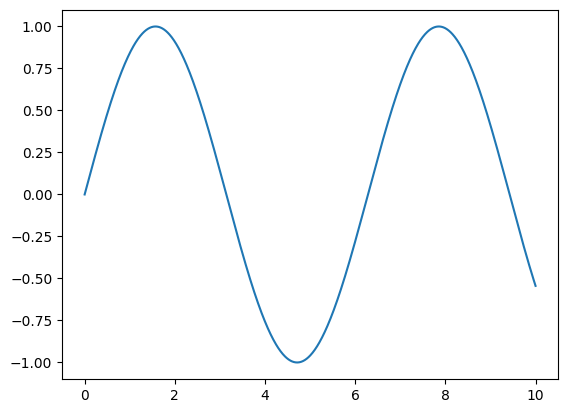

In [66]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)
plt.plot(x,y)

C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\3687299302.py:2: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


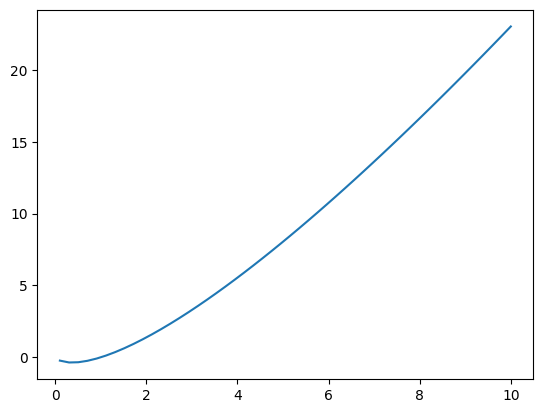

In [67]:
x = np.linspace(-10,10,100)
y = x * np.log(x)
plt.plot(x,y)

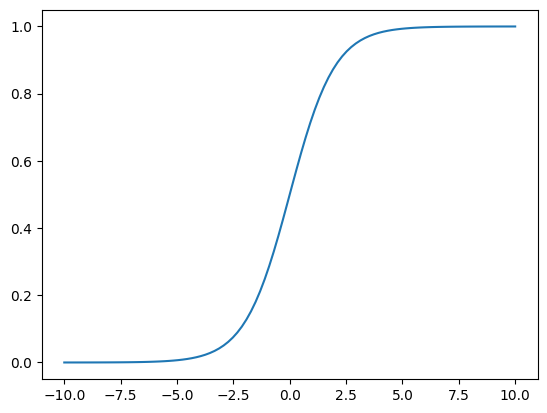

In [68]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

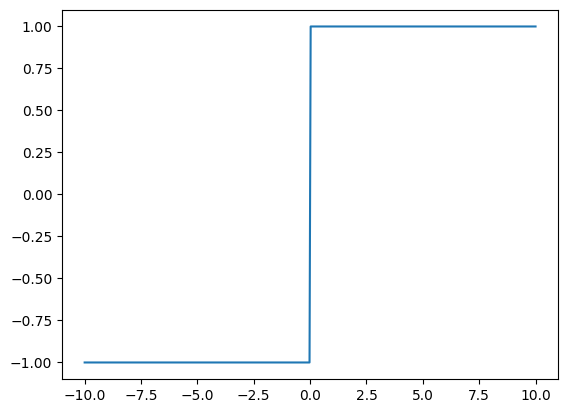

In [69]:
def signum(x):
    return np.sign(x)

# Create an array of x values
x = np.linspace(-10, 10, 400)

# Apply the signum function to the array
y = signum(x)

# Plotting
plt.plot(x, y)

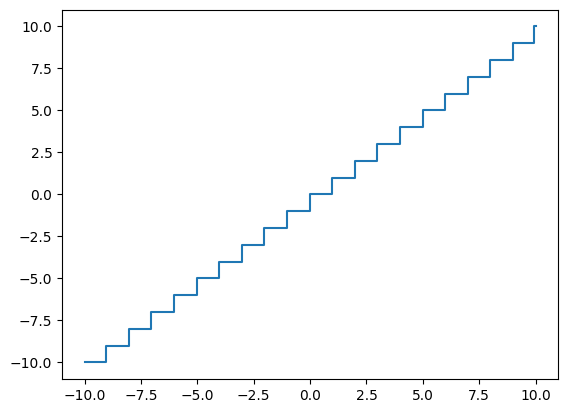

In [70]:
def greatest_integer(x):
    return np.floor(x)

# Create an array of x values (dense range for better visualization)
x = np.linspace(-10, 10, 400)

# Apply the greatest integer function to the array
y = greatest_integer(x)

# Plotting
plt.step(x, y)

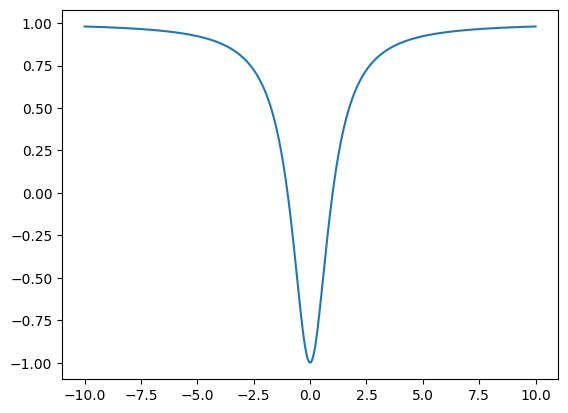

In [73]:
def rational_function(x):
    return (x**2 - 1) / (x**2 + 1)

# Create an array of x values, avoiding the point where the denominator is zero
x = np.linspace(-10, 10, 400)
y = rational_function(x)

# Plotting the rational function
plt.plot(x, y)

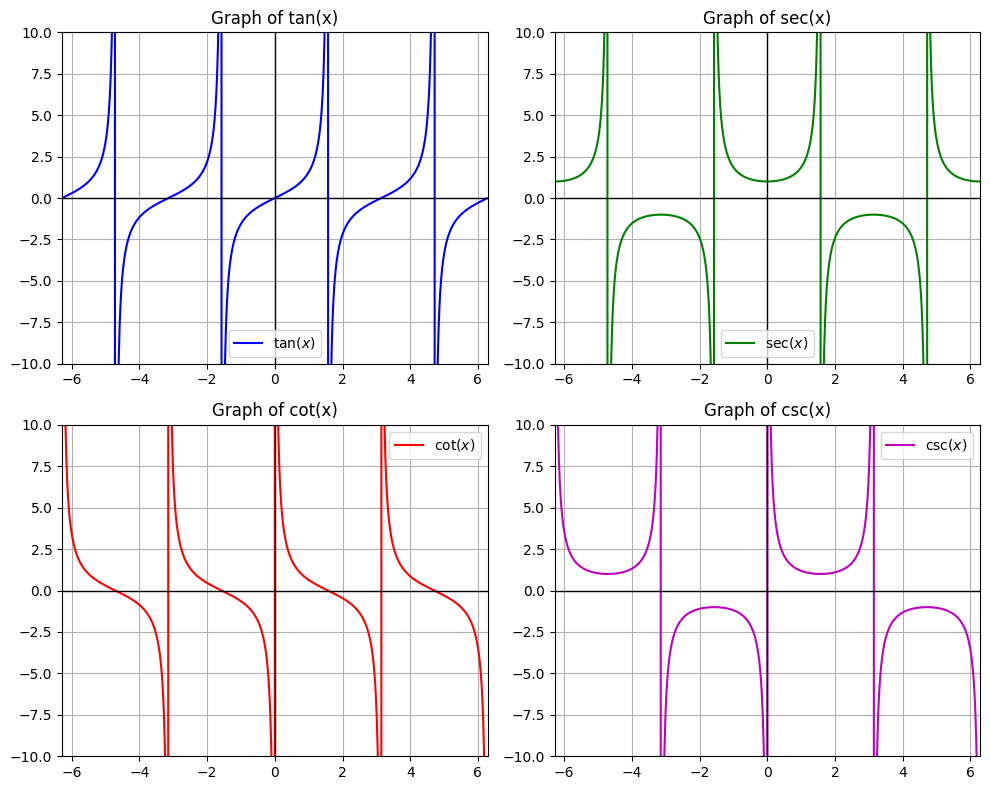

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the trigonometric functions
def tan_func(x):
    return np.tan(x)

def sec_func(x):
    return 1 / np.cos(x)

def cot_func(x):
    return 1 / np.tan(x)

def csc_func(x):
    return 1 / np.sin(x)

# Create an array of x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# To avoid division by zero for sec, cot, and csc functions, we mask those values
x = x[np.abs(np.cos(x)) > 1e-10]  # Remove points where cos(x) is close to zero
x = x[np.abs(np.sin(x)) > 1e-10]  # Remove points where sin(x) is close to zero

# Plotting the functions
plt.figure(figsize=(10, 8))

# Plot tan(x)
plt.subplot(2, 2, 1)
plt.plot(x, tan_func(x), label=r'$\tan(x)$', color='b')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of tan(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot sec(x)
plt.subplot(2, 2, 2)
plt.plot(x, sec_func(x), label=r'$\sec(x)$', color='g')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of sec(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot cot(x)
plt.subplot(2, 2, 3)
plt.plot(x, cot_func(x), label=r'$\cot(x)$', color='r')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of cot(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot csc(x)
plt.subplot(2, 2, 4)
plt.plot(x, csc_func(x), label=r'$\csc(x)$', color='m')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of csc(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


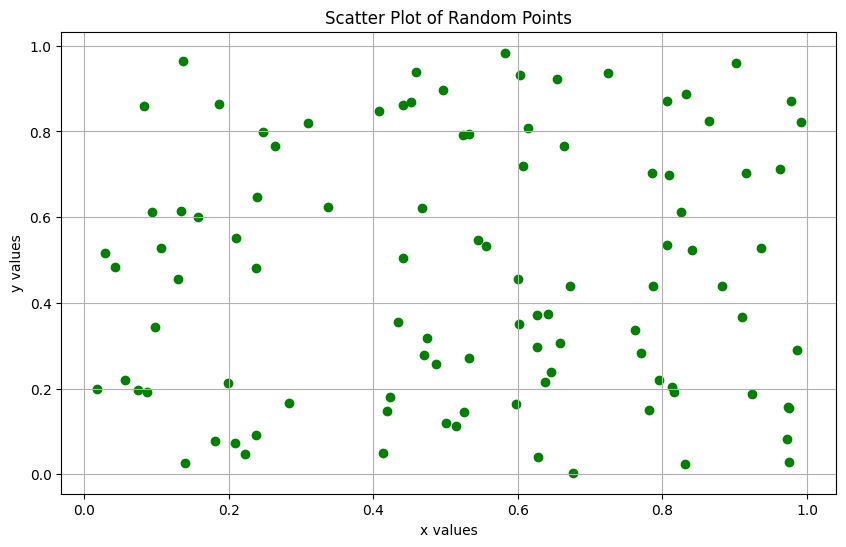

In [75]:
# Generate 100 random points for x and y
x = np.random.rand(100)
y = np.random.rand(100)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', marker='o')
plt.title('Scatter Plot of Random Points')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid(True)
plt.show()
